For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import numpy as np
import scipy.stats
from scipy.stats import chi2_contingency

In [4]:
#Loading dataset
titanic=pd.read_csv("titanic.csv")

In [5]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [75]:
# Checking dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Age_Category  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Determine if the survival rate is associated to the class of passenger

In [90]:
# Creating a function to check survivor rate
survivor_count = titanic['Survived'].sum()
def survival_rate (df,factor):
    by_factor = df.groupby(factor)
    count_by_factor = by_factor['Survived'].sum()
    survival_rate = count_by_factor / survivor_count * 100
    print('Survival rates:', survival_rate, '\n \n', 'Counts: ', count_by_factor)

In [76]:
# Calculate number of passengers in each class
total_passenger_count = len(titanic['Pclass'])
first_class_count = (titanic['Pclass'] == 1).sum()
second_class_count = (titanic['Pclass'] == 2).sum()
third_class_count = (titanic['Pclass'] == 3).sum()

per_first_class =  first_class_count / total_passenger_count * 100
per_second_class = second_class_count / total_passenger_count * 100
per_third_class = third_class_count / total_passenger_count * 100

In [77]:
print('First class percentage = ', per_first_class, ' | Count: ', first_class_count)
print('Second class percentage = ', per_second_class, ' | Count: ', second_class_count)
print('Third class percentage = ', per_third_class, ' | Count: ', third_class_count)

First class percentage =  24.242424242424242  | Count:  216
Second class percentage =  20.65095398428732  | Count:  184
Third class percentage =  55.106621773288445  | Count:  491


In [68]:
CrosstabResult=pd.crosstab(index=titanic['Survived'],columns=titanic['Pclass'])
print(CrosstabResult)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [92]:
survival_rate(titanic,'Pclass')

Survival rates: Pclass
1    39.766082
2    25.438596
3    34.795322
Name: Survived, dtype: float64 
 
 Counts:  Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


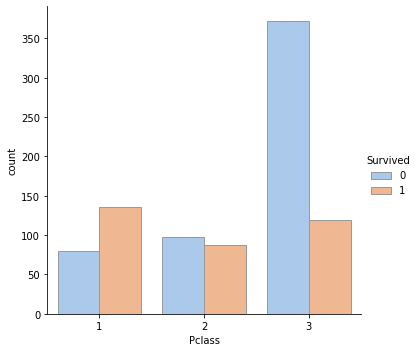

In [53]:
sns.catplot(x="Pclass", hue="Survived", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic)

## Determine if the survival rate is associated to the gender

In [87]:
# Creating a function to calculate number of people based on gender if they survived or not
def get_counts(dataframe, factor, quality, status):
    '''
    dataframe - the dataframe on which to apply the function (e.g. 'df' for the Titanic dataframe)
    factor - the column on which to perform the analysis (e.g. 'Pclass' for the ticket class)
    quality - the quality on which to perform the analysis (e.g '3' for the third class)
    status - the status you want to count: survival or death. Should be a Boolean (1 for survival, 0 for death).
    '''
    target = dataframe[factor].where(dataframe[factor] == quality)
    class_count = target.where(dataframe['Survived'] == status).count()
    return class_count

In [90]:
female_survival_count = get_counts(titanic, 'Sex', 'female', 1)
male_survival_count = get_counts(titanic, 'Sex', 'male', 1)
female_death_count = get_counts(titanic, 'Sex', 'female', 0)
male_death_count = get_counts(titanic, 'Sex', 'male', 0)
female_survival_percent=(female_survival_count/(female_survival_count+female_death_count))*100
male_survival_percent=(male_survival_count/(male_survival_count+male_death_count))*100

In [92]:
print('SURVIVAL COUNT BY GENDER')
print('Female survival count: ', female_survival_count)
print('Male survival count: ', male_survival_count)
print('\nCASUALTIES COUNT BY GENDER')
print('Female death count: ', female_death_count)
print('Male death count: ', male_death_count)
print('\nPERCENTAGE OF SURVIVORS BY GENDER')
print('{:.2f} % of females survived'.format(female_survival_percent)) 
print('{:.2f} % of males survived'.format(male_survival_percent)) 

SURVIVAL COUNT BY GENDER
Female survival count:  233
Male survival count:  109

CASUALTIES COUNT BY GENDER
Female death count:  81
Male death count:  468

PERCENTAGE OF SURVIVORS BY GENDER
74.20 % of females survived
18.89 % of males survived


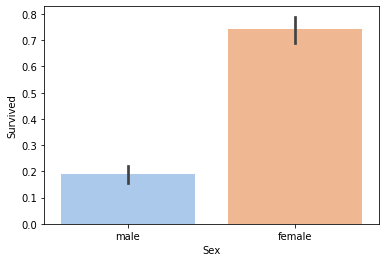

In [73]:
sns.barplot(x='Sex', y='Survived', data=titanic, palette='pastel')

## Determine if survival rate is assosiated with age

In [28]:
# Rectifying the null values of Age column
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Age_Category  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [31]:
# Creating a new column to categorize the age
condition=[
            (titanic['Age']<=21),
            (titanic['Age']>=21) & (titanic['Age']<50),
            ( titanic['Age']>=50)
            ]
values=['Young','Middle Age','Old']
titanic['Age_Category']=np.select(condition,values)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Middle Age
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle Age
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Middle Age
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Middle Age
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Middle Age


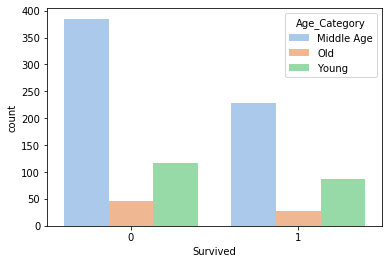

In [74]:
sns.countplot(hue='Age_Category', x='Survived', data=titanic, palette='pastel')

### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 